# Import some module

Module used:
- custom algorithm from `main.py` file
- random to generate some random number
- pandas as data type
- matplotlib as visualization tools

In [1]:
from main import PSOxBackpro

from random import random
import pandas as pd
from matplotlib import pyplot as plt

# Data Preparation

1. Load dataset `dataset_minyak_kelapa_sawit.csv` to pandas dataframe
2. Normalize data using min-max normalization
3. Shifting data n-5 to built time series data
4. Split data into train and test data

In [2]:
dataset = pd.read_csv('dataset_minyak_kelapa_sawit.csv')
dataset_value = dataset.iloc[:, 1].values

normalized_dataset = list()
for x in range(len(dataset_value)):
    norm_value = (dataset_value[x] - min(dataset_value)) / (
        max(dataset_value) - min(dataset_value))
    normalized_dataset.append(norm_value)

time_series_dataset = [
    normalized_dataset[:len(normalized_dataset) - 5],
    normalized_dataset[1:len(normalized_dataset) - 4],
    normalized_dataset[2:len(normalized_dataset) - 3],
    normalized_dataset[3:len(normalized_dataset) - 2],
    normalized_dataset[4:len(normalized_dataset) - 1],
    normalized_dataset[5:]]

print("Time Series")
print(pd.DataFrame([list(i) for i in zip(*time_series_dataset)]))

df = pd.DataFrame([list(i) for i in zip(*time_series_dataset)])


X_train = df.iloc[:, :5]
Y_train = df.iloc[:, 5]
X_test = df.iloc[:, :5]
Y_test = df.iloc[:, 5]

max_val = 1292.0
min_val = 538.0


Time Series
           0         1         2         3         4         5
0   0.031830  0.045093  0.079576  0.217507  0.348806  0.249337
1   0.045093  0.079576  0.217507  0.348806  0.249337  0.133952
2   0.079576  0.217507  0.348806  0.249337  0.133952  0.245358
3   0.217507  0.348806  0.249337  0.133952  0.245358  0.180371
4   0.348806  0.249337  0.133952  0.245358  0.180371  0.188329
5   0.249337  0.133952  0.245358  0.180371  0.188329  0.248011
6   0.133952  0.245358  0.180371  0.188329  0.248011  0.336870
7   0.245358  0.180371  0.188329  0.248011  0.336870  0.338196
8   0.180371  0.188329  0.248011  0.336870  0.338196  0.344828
9   0.188329  0.248011  0.336870  0.338196  0.344828  0.389920
10  0.248011  0.336870  0.338196  0.344828  0.389920  0.387268
11  0.336870  0.338196  0.344828  0.389920  0.387268  0.362069
12  0.338196  0.344828  0.389920  0.387268  0.362069  0.344828
13  0.344828  0.389920  0.387268  0.362069  0.344828  0.356764
14  0.389920  0.387268  0.362069  0.344828 

# HyperParameter Test: Max Iteration

Control Variable:
```text
t_max       =   to be tested
pop_size    =   10
c1          =   1   
c2          =   1   
w           =   1
k           =   1   
```

.....
Iter param test for 20 is complete
.....
Iter param test for 40 is complete
.....
Iter param test for 60 is complete
.....
Iter param test for 80 is complete
.....
Iter param test for 100 is complete
.....
Iter param test for 120 is complete
.....
Iter param test for 140 is complete
.....
Iter param test for 160 is complete
.....
Iter param test for 180 is complete
.....
Iter param test for 200 is complete


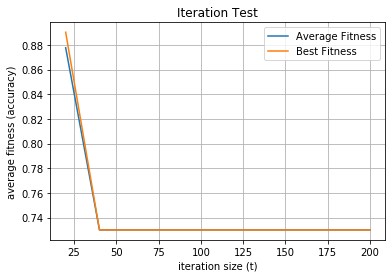

In [11]:
g_best_fitness = []
average_fitness = []

# Pengujian jumlah iterasi PSO
iter_param_test = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
pso_backpp = PSOxBackpro(pop_size=10, particle_size=15, k=1)
pso_backpp.set_backpro_param(X_train, Y_train, X_test, Y_test, max_val, min_val, epoch=40)    
for iterasi in range(len(iter_param_test)):
    g_best_fitness_temp = 0
    average_fitness_temp = 0
    for i in range(5):
        # pengujian dilakukan 5 kali
        print('.',end=' ')
        pso_backpp.initPops()
        gbest_fitness, avg_fitness = pso_backpp.optimize(
            iter_param_test[iterasi], 1, 1, 1)
        g_best_fitness_temp += gbest_fitness
        average_fitness_temp += avg_fitness
    print(f"\nIter param test for {iter_param_test[iterasi]} is complete")
    g_best_fitness.append(g_best_fitness_temp / 5)
    average_fitness.append(average_fitness_temp / 5)


fig, ax = plt.subplots()
ax.plot(iter_param_test, average_fitness, label="Average Fitness")
ax.plot(iter_param_test, g_best_fitness, label="Best Fitness")
ax.legend(loc="upper right")

ax.set(xlabel='iteration size (t)', ylabel='average fitness (accuracy)',
       title='Iteration Test')
ax.grid()

fig.savefig("result/iter_test.png")

plt.show()

# HyperParameter Test: PSO's Particle Pop Size

Control Variable
```text
t_max       =   25
pop_size    =   to be tested
c1          =   1   
c2          =   1   
w           =   1
k           =   1   
```

.....
Particle param test for 5 is complete
.....
Particle param test for 10 is complete
.....
Particle param test for 15 is complete
.....
Particle param test for 20 is complete
.....
Particle param test for 25 is complete
.....
Particle param test for 30 is complete
.....
Particle param test for 35 is complete
.....
Particle param test for 40 is complete
.....
Particle param test for 45 is complete
.....
Particle param test for 50 is complete
.....
Particle param test for 55 is complete
.....
Particle param test for 60 is complete


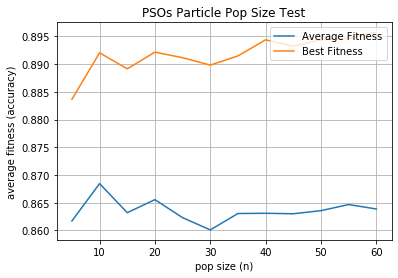

In [12]:
g_best_fitness = []
average_fitness = []

# Pengujian jumlah partikel dalam pso
part_size_param_test = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
for part_size in range(len(part_size_param_test)):
    g_best_fitness_temp = 0
    average_fitness_temp = 0
    for i in range(5):
        # pengujian dilakukan 5 kali
        print('.',end=' ')
        pso_backpp = PSOxBackpro(part_size_param_test[part_size], 15, 1)
        pso_backpp.set_backpro_param(X_train, Y_train, X_test, Y_test, max_val, min_val, epoch=40)
        pso_backpp.initPops()
        gbest_fitness, avg_fitness = pso_backpp.optimize(25, 1, 1, 1)
        g_best_fitness_temp += gbest_fitness
        average_fitness_temp += avg_fitness
    print(f"\nParticle param test for {part_size_param_test[part_size]} is complete")
    g_best_fitness.append(g_best_fitness_temp / 5)
    average_fitness.append(average_fitness_temp / 5)


fig, ax = plt.subplots()
ax.plot(part_size_param_test, average_fitness, label="Average Fitness")
ax.plot(part_size_param_test, g_best_fitness, label="Best Fitness")
ax.legend(loc="upper right")

ax.set(xlabel='pop size (n)', ylabel='average fitness (accuracy)',
       title='PSOs Particle Pop Size Test')
ax.grid()

fig.savefig("result/par_pop_size_test.png")

plt.show()

# HyperParameter Test: Combination of c1 & c2 

Control Variable
```text
t_max       =   25
pop_size    =   40
c1          =   to be tested   
c2          =   to be tested   
w           =   1
k           =   1   
```

.....
c1 & c2 param test for (2.5, 0.5) is complete
.....
c1 & c2 param test for (2, 1) is complete
.....
c1 & c2 param test for (1.5, 1.5) is complete
.....
c1 & c2 param test for (1, 2) is complete
.....
c1 & c2 param test for (0.5, 2.5) is complete


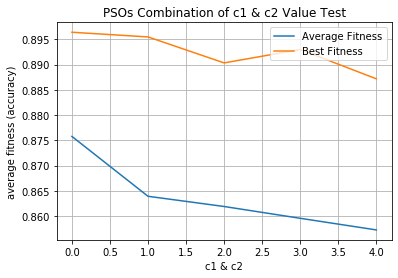

In [8]:
g_best_fitness = []
average_fitness = []

# Pengujian jumlah partikel dalam pso
c_param_test = [(2.5, 0.5), (2, 1), (1.5, 1.5), (1, 2), (0.5, 2.5)]
param_test_str = []
for c in range(len(c_param_test)):
    g_best_fitness_temp = 0
    average_fitness_temp = 0
    param_test_str.append(c)
    for i in range(5):
        # pengujian dilakukan 5 kali
        print('.',end=' ')
        pso_backpp = PSOxBackpro(40, 15, 1)
        pso_backpp.set_backpro_param(X_train, Y_train, X_test, Y_test, max_val, min_val, epoch=40)
        pso_backpp.initPops()
        gbest_fitness, avg_fitness = pso_backpp.optimize(25, 1, c_param_test[c][0], c_param_test[c][1])
        g_best_fitness_temp += gbest_fitness
        average_fitness_temp += avg_fitness
    print(f"\nc1 & c2 param test for {c_param_test[c]} is complete")
    g_best_fitness.append(g_best_fitness_temp / 5)
    average_fitness.append(average_fitness_temp / 5)


fig, ax = plt.subplots()
ax.plot(param_test_str, average_fitness, label="Average Fitness")
ax.plot(param_test_str, g_best_fitness, label="Best Fitness")
ax.legend(loc="upper right")

ax.set(xlabel='c1 & c2', ylabel='average fitness (accuracy)',
       title='PSOs Combination of c1 & c2 Value Test')
ax.grid()

fig.savefig("result/c_value_test.png")

plt.show()

# HyperParameter Test: w Value Test

Control Variable
```text
t_max       =   25
pop_size    =   40
c1          =   0.4 
c2          =   2.5   
w           =   to be tested
k           =   1   
```

.....
w param test for 0.4 is complete
.....
w param test for 0.5 is complete
.....
w param test for 0.6 is complete
.....
w param test for 0.7 is complete
.....
w param test for 0.8 is complete
.....
w param test for 0.9 is complete


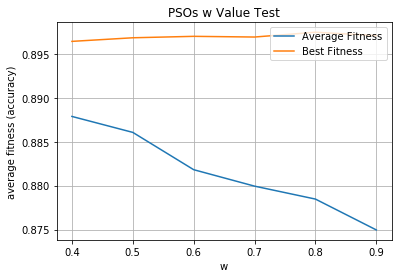

In [9]:
g_best_fitness = []
average_fitness = []

# Pengujian jumlah partikel dalam pso
w_param_test = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for w in range(len(w_param_test)):
    g_best_fitness_temp = 0
    average_fitness_temp = 0
    for i in range(5):
        # pengujian dilakukan 5 kali
        print('.',end=' ')
        pso_backpp = PSOxBackpro(40, 15, 1)
        pso_backpp.set_backpro_param(X_train, Y_train, X_test, Y_test, max_val, min_val, epoch=40)
        pso_backpp.initPops()
        gbest_fitness, avg_fitness = pso_backpp.optimize(25, w_param_test[w], 2.5, 0.5)
        g_best_fitness_temp += gbest_fitness
        average_fitness_temp += avg_fitness
    print(f"\nw param test for {w_param_test[w]} is complete")
    g_best_fitness.append(g_best_fitness_temp / 5)
    average_fitness.append(average_fitness_temp / 5)


fig, ax = plt.subplots()
ax.plot(w_param_test, average_fitness, label="Average Fitness")
ax.plot(w_param_test, g_best_fitness, label="Best Fitness")
ax.legend(loc="upper right")

ax.set(xlabel='w', ylabel='average fitness (accuracy)',
       title='PSOs w Value Test')
ax.grid()

fig.savefig("result/w_value_test.png")

plt.show()

# HyperParameter Test: k-Velocity Clamping Value Test

Control Variable
```text
t_max       =   25
pop_size    =   40
c1          =   0.4 
c2          =   2.5   
w           =   0.5
k           =   1   
```

.....
k param test for 0.2 is complete
.....
k param test for 0.4 is complete
.....
k param test for 0.6 is complete
.....
k param test for 0.8 is complete
.....
k param test for 1 is complete


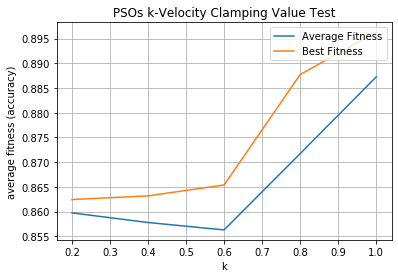

In [10]:
g_best_fitness = []
average_fitness = []

# Pengujian jumlah partikel dalam pso
k_param_test = [0.2, 0.4, 0.6, 0.8, 1]
for k in range(len(k_param_test)):
    g_best_fitness_temp = 0
    average_fitness_temp = 0
    for i in range(5):
        # pengujian dilakukan 5 kali
        print('.',end=' ')
        pso_backpp = PSOxBackpro(40, 15, k_param_test[k])
        pso_backpp.set_backpro_param(X_train, Y_train, X_test, Y_test, max_val, min_val, epoch=40)
        pso_backpp.initPops()
        gbest_fitness, avg_fitness = pso_backpp.optimize(25, 0.4, 2.5, 0.5)
        g_best_fitness_temp += gbest_fitness
        average_fitness_temp += avg_fitness
    print(f"\nk param test for {k_param_test[k]} is complete")
    g_best_fitness.append(g_best_fitness_temp / 5)
    average_fitness.append(average_fitness_temp / 5)


fig, ax = plt.subplots()
ax.plot(k_param_test, average_fitness, label="Average Fitness")
ax.plot(k_param_test, g_best_fitness, label="Best Fitness")
ax.legend(loc="upper right")

ax.set(xlabel='k', ylabel='average fitness (accuracy)',
       title='PSOs k-Velocity Clamping Value Test')
ax.grid()

fig.savefig("result/k_value_test.png")

plt.show()